<a href="https://colab.research.google.com/github/geekninja1708/Coding-Exercises/blob/master/Geoelectromagnetic%20Exploraation%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import scipy.special as ss
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.integrate as si
from sklearn import metrics

In [376]:
r=np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])


In [377]:

def besselfunctions(x,threshold):
  x=r
  lamda=np.linspace(0,10000,100000)
  lamda1=x[0]*lamda
  b=ss.jv(0,lamda1) #bessel equation for all values of lambda
  for i in range(len(lamda1)-100):
    absol=np.absolute(b[i:i+100]) #Convergence condition
    suma=np.sum(absol)
    if suma<=threshold:
      endarg=i
  lamdacon=lamda[0:i]#As the solution to bessel equation should be convergent
  M=len(x)# list of values of radius
  N=len(lamdacon)# list of lambdas provoding convergent bessel functions
  functions=np.zeros((M,N))
  for j1 in range(M):
    for j2 in range(N):
      functions[j1,j2]=ss.jv(0,x[j1]*lamdacon[j2])# list of bessel functions
  

  

  return functions,lamdaN,x


In [378]:
#To make a list of slope values(that is the thing inside the integral)
rho=[9,8,5,4,2]#Arbitary values of rho
Thickness=[10,12,15,20,9]#Thickness of variuos layers

In [379]:
#print(rho)
#print(Thick)

In [380]:
def Potential(r,threshold,Kn,rho,thickness,Current): 
  functions,lamdaN,x=besselfunctions(r,threshold)
  N=len(thickness)
  K=np.zeros((N,len(lamdaN)))
  K[N-1]=Kn
  Constant=Current/(2*np.pi*(1/rho[0])) #computation of constant
  for j1 in range(0,N-1):
    for j2 in range(len(lamdaN)):
      K[N-(j1+2),j2]=(K[N-(j1+1),j2]+((rho[N-(j1+2)]/rho[N-(j1+1)])*np.tanh(lamdaN[j2]*thickness[N-(j1+2)])))/((rho[N-(j1+2)]/rho[N-(j1+1)])+(K[N-(j1+1),j2]*np.tanh(lamdaN[j2]*thickness[N-(j1+2)])))# recurrence boundary condition to compute K1
      #print(K)
  c=np.multiply(functions,K[0])# multiplying bessel function and K1
  (Row,Col)=c.shape
  Computed_potential=np.zeros((Row,1))
  for i in range(Row):
    Computed_potential[i,0]=Constant*si.simps(c[i],dx=0.1)# integral for computation of potential
  return x,Computed_potential,K

In [381]:
Kn=np.ones((1,len(lamdaN)))
radius,I,K=Potential(r,0.001,Kn,rho,Thickness,1)
#print(radius)

Text(0, 0.5, 'Potential')

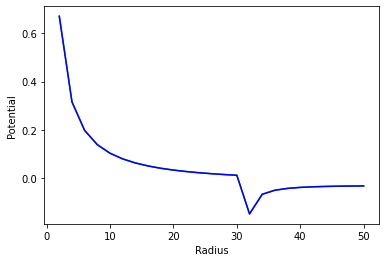

In [382]:
#print(I,d)
plt.plot(d,I)
plt.plot(d,I,'b',label='Constructed Model')
plt.xlabel('Radius')
plt.ylabel('Potential')

In [383]:
x=r
pot_analytical=[]
for i in range(len(x)):
  Ab=(rho[0]/(2*np.pi))*(1/d[i])
  pot_analytical.append(Ab)
#print(pot_analytical)

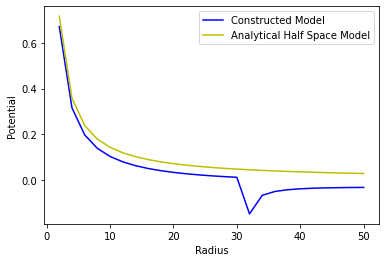

In [384]:
plt.figure()
plt.xlabel('Radius')
plt.ylabel('Potential')
plt.plot(d,I,'b',label='Constructed Model')
plt.plot(x,pot_analytical,'y',label='Analytical Half Space Model')
plt.legend()
plt.show()

In [390]:
error1= metrics.mean_absolute_error(I, pot_analytical)
error= metrics.mean_squared_error(I, pot_analytical)
print("The mean absolute error, mean squared error and root mean squared error are",error1,',',error,'&',np.sqrt(error),'respectively.')


The mean absolute error, mean squared error and root mean squared error are 0.058303270993937104 , 0.004529147246897481 & 0.06729893941881611 respectively.
